In [1]:
# 패키지 불러오기

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [13]:
# 데이터구성

In [3]:
df = pd.read_csv("HMEQ.csv", engine='python')
df.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [4]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,DebtCon,Other,16.0,0,0.0,221.808717,0.0,16,36.112347
3744,0,89000,54576,92937.0,DebtCon,Other,16.0,0,0.0,208.692070,0.0,15,35.859971
3745,0,89200,54045,92924.0,DebtCon,Other,15.0,0,0.0,212.279697,0.0,15,35.556590
3746,0,89800,50370,91861.0,DebtCon,Other,14.0,0,0.0,213.892709,0.0,16,34.340882


In [5]:
df['JOB'].fillna('Other', inplace=True)
df.fillna(df.mean(), inplace=True)

In [6]:
df_dummy = pd.get_dummies(df)
df_dummy

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,16.0,0,0.0,221.808717,0.0,16,36.112347,1,0,0,0,1,0,0,0
3744,0,89000,54576,92937.0,16.0,0,0.0,208.692070,0.0,15,35.859971,1,0,0,0,1,0,0,0
3745,0,89200,54045,92924.0,15.0,0,0.0,212.279697,0.0,15,35.556590,1,0,0,0,1,0,0,0
3746,0,89800,50370,91861.0,14.0,0,0.0,213.892709,0.0,16,34.340882,1,0,0,0,1,0,0,0


In [7]:
df_y = df_dummy['BAD']
df_x = df_dummy.drop('BAD', axis=1, inplace=False)

In [8]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size =0.3, random_state=1234)
print("train data X size : ", df_train_x.shape)
print("train data Y size : ", df_train_y.shape)
print("test data X size : " ,df_test_x.shape)
print("test data Y size : " ,df_test_x.shape)

train data X size :  (2623, 18)
train data Y size :  (2623,)
test data X size :  (1125, 18)
test data Y size :  (1125, 18)


In [38]:
# 모델생성

In [14]:
tree_uncusomized = DecisionTreeClassifier(random_state=1234)
tree_uncusomized.fit(df_train_x, df_train_y);

print("Accuracy on training set ", tree_uncusomized.score(df_train_x, df_train_y))
print("Accuracy on test set ", tree_uncusomized.score(df_test_x, df_test_y))

Accuracy on training set  1.0
Accuracy on test set  0.9315555555555556


In [15]:
# 모델 parameter 조정

In [17]:
train_accuracy = []
test_accuracy = []
para_depth = [depth for depth in range(1,11)]
for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state=1234, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainScore"] = train_accuracy
df_accuracy_depth["TestScore"] = test_accuracy
df_accuracy_depth.round(3)


,Depth,TrainScore,TestScore
0,1,0.926,0.924
1,2,0.931,0.927
2,3,0.934,0.921
3,4,0.937,0.928
4,5,0.940,0.930
5,6,0.941,0.930
6,7,0.947,0.935
7,8,0.951,0.933
8,9,0.957,0.933
9,10,0.960,0.938


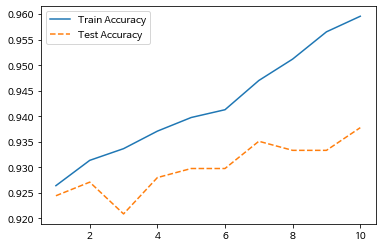

In [18]:
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle="--", label= "Test Accuracy")
plt.legend()

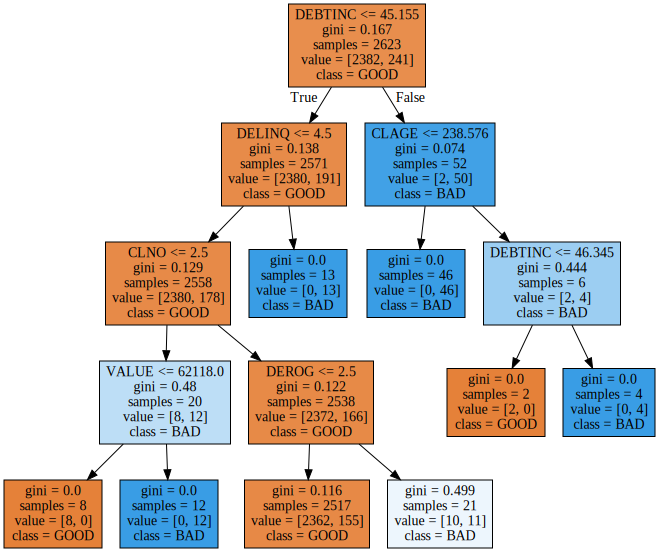

In [20]:
v_feature_name = df_train_x.columns
tree_low = DecisionTreeClassifier(random_state=1234, max_depth=4)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file="tree_low.dot", class_names=["GOOD", "BAD"], feature_names = v_feature_name, impurity=True, filled=True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


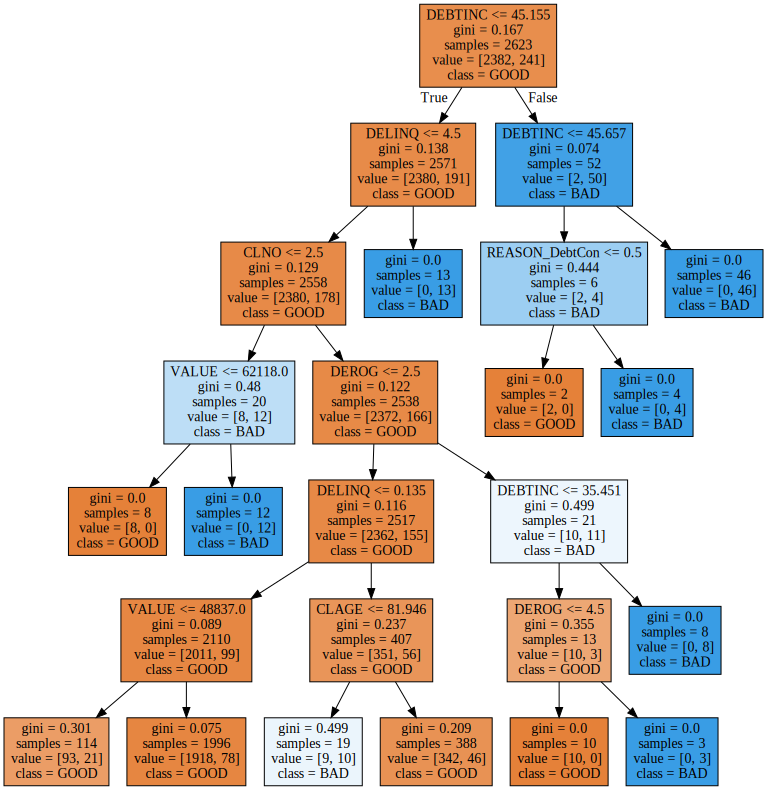

In [21]:
v_feature_name = df_train_x.columns
tree_high = DecisionTreeClassifier(random_state=1234, max_depth=6)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_high, out_file="tree_high.dot", class_names=["GOOD", "BAD"], feature_names = v_feature_name, impurity=True, filled=True)

with open("tree_high.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


In [22]:
train_accuracy = []
test_accuracy = []
para_split = [n_split * 10 for n_split in range(1,11)]
for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state=1234, max_depth = 4, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainScore"] = train_accuracy
df_accuracy_split["TestScore"] = test_accuracy
df_accuracy_split.round(3)


,MinSamplesSplit,TrainScore,TestScore
0,10,0.936,0.928
1,20,0.936,0.928
2,30,0.933,0.921
3,40,0.933,0.921
4,50,0.933,0.921
5,60,0.933,0.921
6,70,0.933,0.921
7,80,0.933,0.921
8,90,0.933,0.921
9,100,0.933,0.921


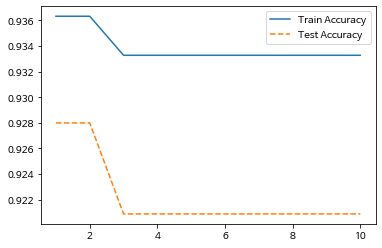

In [23]:
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle="--", label= "Test Accuracy")
plt.legend()

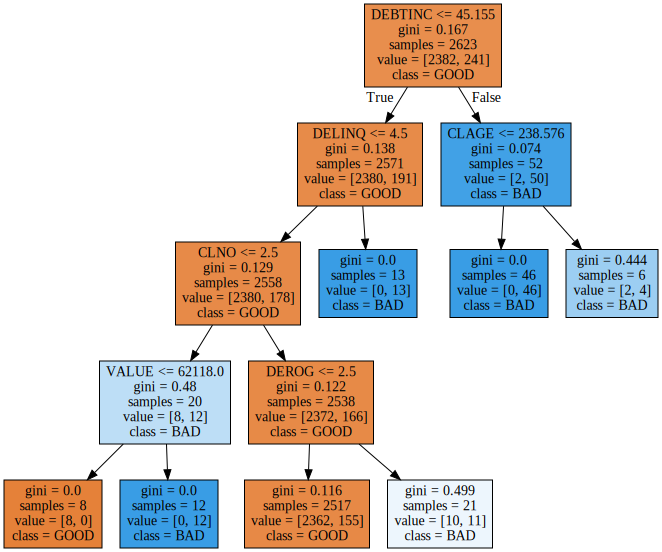

In [24]:
v_feature_name = df_train_x.columns
tree_low = DecisionTreeClassifier(random_state=1234, max_depth=4, min_samples_split=20)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file="tree_low.dot", class_names=["GOOD", "BAD"], feature_names = v_feature_name, impurity=True, filled=True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


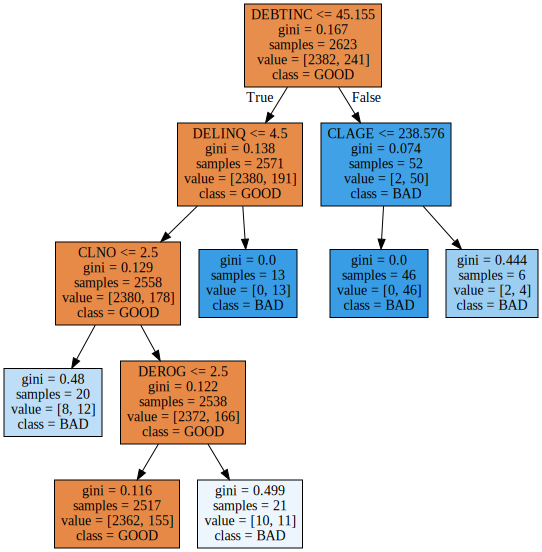

In [25]:
v_feature_name = df_train_x.columns
tree_high = DecisionTreeClassifier(random_state=1234, max_depth=4, min_samples_split=30)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_high, out_file="tree_high.dot", class_names=["GOOD", "BAD"], feature_names = v_feature_name, impurity=True, filled=True)

with open("tree_high.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


In [28]:
train_accuracy = []
test_accuracy = []
para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state=1234, min_samples_leaf=v_min_samples_leaf, min_samples_split=20, 
                                max_depth=4)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainScore"] = train_accuracy
df_accuracy_leaf["TestScore"] = test_accuracy

df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.936,0.928
1,4,0.936,0.928
2,6,0.936,0.928
3,8,0.936,0.928
4,10,0.936,0.928
5,12,0.933,0.921
6,14,0.932,0.917
7,16,0.932,0.919
8,18,0.932,0.919
9,20,0.932,0.919


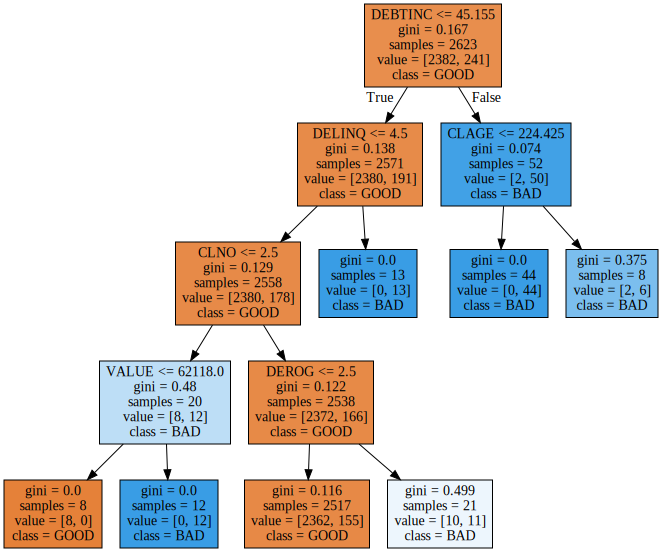

In [29]:
v_feature_name = df_train_x.columns
tree_low = DecisionTreeClassifier(random_state=1234, max_depth=4, min_samples_split=20, min_samples_leaf=8)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file="tree_low.dot", class_names=["GOOD", "BAD"], feature_names = v_feature_name, impurity=True, filled=True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

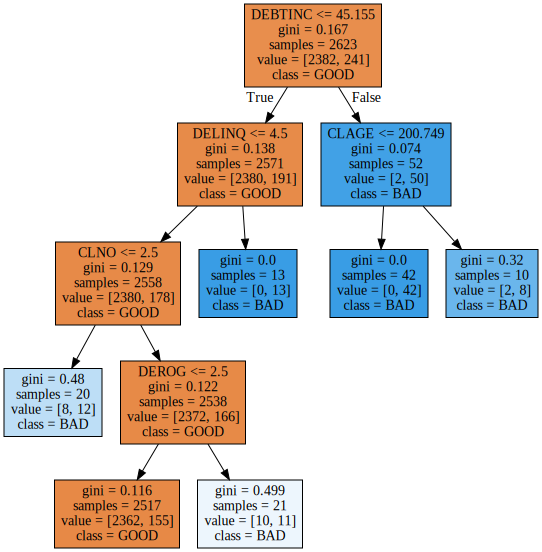

In [30]:
v_feature_name = df_train_x.columns
tree_high = DecisionTreeClassifier(random_state=1234, max_depth=4, min_samples_split=30, min_samples_leaf=10)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_high, out_file="tree_high.dot", class_names=["GOOD", "BAD"], feature_names = v_feature_name, impurity=True, filled=True)

with open("tree_high.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [31]:
tree_final = DecisionTreeClassifier(random_state=1234, min_samples_leaf=8, min_samples_split=20, max_depth=4)
tree_final.fit(df_train_x, df_train_y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

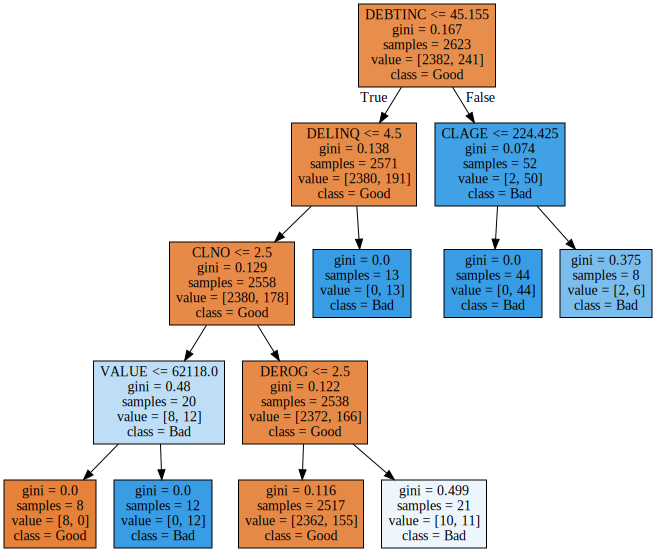

In [32]:
export_graphviz(tree_final, out_file="tree_final.dot", class_names=["Good", "Bad"], feature_names = v_feature_name, impurity=True, filled=True)

with open('tree_final.dot')as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [33]:
# 최종모델평가

In [35]:
y_pred = tree_final.predict(df_test_x)
print("Accuracy :", tree_final.score(df_test_x, df_test_y))
print("Confusion matrix:\n", confusion_matrix(df_test_y, y_pred))

Accuracy : 0.928
Confusion matrix:
 [[1015    6]
 [  75   29]]


In [36]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.602
5,DELINQ,0.168
8,CLNO,0.085
2,VALUE,0.072
4,DEROG,0.067
6,CLAGE,0.006
12,JOB_Mgr,0.000
16,JOB_Sales,0.000
15,JOB_ProfExe,0.000
14,JOB_Other,0.000


Text(0, 0.5, '변수')

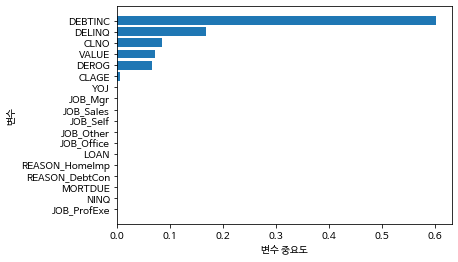

In [37]:
df_importance.sort_values("Importance", ascending = True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [38]:
estimator = DecisionTreeClassifier()
param_grid = {"max_depth":para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_dt = GridSearchCV(estimator,param_grid, scoring="accuracy", n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)

print("best model : ", grid_dt.best_estimator_)
print("best parameter: ", grid_dt.best_params_)
print("best score : ", grid_dt.best_score_.round(3))




/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best model :  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
best parameter:  {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 10}
best score :  0.936
